# Importing and Reading Files

In [29]:
import geopy 
from geopy.geocoders import Nominatim 
import time
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [30]:
#main housing data
df = pd.read_csv('data/kc_house_data.csv')

In [31]:
## Do an inner join and groupby on this
#first import zipcode csv from king co website
# https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::zipcodes-for-king-county-and-surrounding-area-shorelines-zipcode-shore-area/explore
dfz = pd.read_csv('data/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.csv')

# Preliminary Exploration and Data Cleaning

In [32]:
df[df.duplicated(keep=False)].sort_values(by='address').head()

id       date      price  bedrooms  bathrooms  sqft_living  \
4845  1233100736  9/28/2021  2600000.0         3        4.0         3500   
4846  1233100736  9/28/2021  2600000.0         3        4.0         3500   

      sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
4845      8455     2.0         NO        NO  ...       PUBLIC       2590   
4846      8455     2.0         NO        NO  ...       PUBLIC       2590   

     sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
4845          1410         500        290     2019             0   
4846          1410         500        290     2019             0   

                                                address       lat        long  
4845  12611 Northeast 87th Place, Kirkland, Washingt...  47.68069 -122.172135  
4846  12611 Northeast 87th Place, Kirkland, Washingt...  47.68069 -122.172135  

[2 rows x 25 columns]

## DELETE THIS^^

In [33]:
# source : https://www.zillow.com/browse/homes/wa/king-county/
KCoZips =  [98052, 98092, 98115, 98103, 98003, 98023, 98105, 98042, 98034, 98133, 98118, 98125, 98058, 
            98031, 98122, 98033, 98032, 98004, 98059, 98001, 98006, 98056, 98030, 98155, 98168, 98117, 
            98002, 98198, 98038, 98029, 98027, 98109, 98074, 98144, 98007, 98040, 98072, 98146, 98011, 
            98107, 98106, 98188, 98008, 98178, 98108, 98075, 98028, 98112, 98119, 98055, 98053, 98102, 
            98022, 98126, 98116, 98005, 98121, 98199, 98177, 98166, 98136, 98045, 98077, 98101, 98057,
            98065, 98104, 98019, 98148, 98014, 98354, 98070, 98010, 98024, 98051, 98047, 98151, 98251,
            98134, 98039, 98195, 98158, 98154, 98161, 98174, 98068, 98256, 98288, 98050, 98132, 98171,
            98184, 98054, 98164, 98181, 98224, 98191, 98009, 98013, 98015, 98025, 98035, 98041, 98062, 
            98064, 98063, 98071, 98073, 98083, 98089, 98093, 98111, 98113, 98114, 98124, 98127, 98131, 
            98129, 98139, 98138, 98141, 98145, 98160, 98165, 98170, 98175, 98185, 98190, 98194, 98471,
            98481]

In [34]:
len(KCoZips)

131

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df['address']
#looks like there are addresses from outside of King County

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [35]:
df['date'] = pd.to_datetime(df['date'])

In [36]:
dfz.head()

OBJECTID    ZIP  ZIPCODE  COUNTY  ZIP_TYPE  COUNTY_NAME PREFERRED_CITY  \
0         1  98001    98001      33  Standard  King County         AUBURN   
1         2  98002    98002      33  Standard  King County         AUBURN   
2         3  98003    98003      33  Standard  King County    FEDERAL WAY   
3         4  98004    98004      33  Standard  King County       BELLEVUE   
4         5  98005    98005      33  Standard  King County       BELLEVUE   

    Shape_Length    Shape_Area  
0  147643.355747  5.253133e+08  
1  104440.086791  2.053028e+08  
2  123619.720418  3.169395e+08  
3  109051.119162  2.017598e+08  
4  116554.737369  2.114337e+08

In [37]:
df['coords'] = list(zip(df['lat'],df['long']))

In [38]:
df['zipcodes'] = df['address'].apply(lambda x: x[-20:-15])

In [39]:
# zipcodes in King Co imported table in integer format, but string in our dataframe
# need to convert zipcode column into integer
df['zipcodes'] = df['zipcodes'].apply(lambda x: int(x))

In [40]:
df['zipcodes'].value_counts()

98042    992
98038    858
98115    761
98103    761
98117    748
        ... 
62204      1
68862      1
85207      1
99202      1
34470      1
Name: zipcodes, Length: 399, dtype: int64

In [41]:
df = df[df['zipcodes'].isin(KCoZips)]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29215 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             29215 non-null  int64         
 1   date           29215 non-null  datetime64[ns]
 2   price          29215 non-null  float64       
 3   bedrooms       29215 non-null  int64         
 4   bathrooms      29215 non-null  float64       
 5   sqft_living    29215 non-null  int64         
 6   sqft_lot       29215 non-null  int64         
 7   floors         29215 non-null  float64       
 8   waterfront     29215 non-null  object        
 9   greenbelt      29215 non-null  object        
 10  nuisance       29215 non-null  object        
 11  view           29215 non-null  object        
 12  condition      29215 non-null  object        
 13  grade          29215 non-null  object        
 14  heat_source    29186 non-null  object        
 15  sewer_system   2920

In [43]:
dfz = dfz[['ZIPCODE', 'PREFERRED_CITY']]

In [44]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ZIPCODE         209 non-null    int64 
 1   PREFERRED_CITY  209 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [45]:
dfz = dfz[dfz['ZIPCODE'].isin(KCoZips)]

In [46]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 148
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ZIPCODE         97 non-null     int64 
 1   PREFERRED_CITY  97 non-null     object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [47]:
# mergeeeee
df = df.merge(dfz, how = 'left', left_on = 'zipcodes', right_on = 'ZIPCODE')

In [48]:
df.shape

(31782, 29)

In [49]:
# the merge created 2500 additional rows

In [50]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31737 entries, 0 to 31781
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              31737 non-null  int64         
 1   date            31737 non-null  datetime64[ns]
 2   price           31737 non-null  float64       
 3   bedrooms        31737 non-null  int64         
 4   bathrooms       31737 non-null  float64       
 5   sqft_living     31737 non-null  int64         
 6   sqft_lot        31737 non-null  int64         
 7   floors          31737 non-null  float64       
 8   waterfront      31737 non-null  object        
 9   greenbelt       31737 non-null  object        
 10  nuisance        31737 non-null  object        
 11  view            31737 non-null  object        
 12  condition       31737 non-null  object        
 13  grade           31737 non-null  object        
 14  heat_source     31737 non-null  object        
 15  se

In [51]:
df[df.duplicated(keep=False)].sort_values(by='address').shape

(5126, 29)

In [52]:
df = df.drop_duplicates(subset=['address'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29015 entries, 0 to 31781
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              29015 non-null  int64         
 1   date            29015 non-null  datetime64[ns]
 2   price           29015 non-null  float64       
 3   bedrooms        29015 non-null  int64         
 4   bathrooms       29015 non-null  float64       
 5   sqft_living     29015 non-null  int64         
 6   sqft_lot        29015 non-null  int64         
 7   floors          29015 non-null  float64       
 8   waterfront      29015 non-null  object        
 9   greenbelt       29015 non-null  object        
 10  nuisance        29015 non-null  object        
 11  view            29015 non-null  object        
 12  condition       29015 non-null  object        
 13  grade           29015 non-null  object        
 14  heat_source     29015 non-null  object        
 15  se

# Data Exploration

In [53]:
X = df.drop(columns = ['price'])
y = df['price']

In [54]:
X.corr()

/var/folders/bf/n_rprvk91ndgxz_bd75lz03h0000gp/T/ipykernel_21283/1968499000.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.corr()


id  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
id             1.000000 -0.006043  -0.013962    -0.028218 -0.121127  0.032791   
bedrooms      -0.006043  1.000000   0.594510     0.629503 -0.000756  0.206114   
bathrooms     -0.013962  0.594510   1.000000     0.780958  0.038990  0.433211   
sqft_living   -0.028218  0.629503   0.780958     1.000000  0.118097  0.368062   
sqft_lot      -0.121127 -0.000756   0.038990     0.118097  1.000000 -0.018161   
floors         0.032791  0.206114   0.433211     0.368062 -0.018161  1.000000   
sqft_above    -0.022402  0.536092   0.681687     0.881266  0.128033  0.518943   
sqft_basement -0.016232  0.234312   0.260994     0.335763  0.001942 -0.241797   
sqft_garage   -0.007142  0.302579   0.461847     0.501736  0.084134  0.190244   
sqft_patio    -0.043077  0.193138   0.334317     0.407442  0.157526  0.124782   
yr_built       0.020605  0.188908   0.457914     0.335366  0.014437  0.515694   
yr_renovated  -0.028657  0.010440   0.043147     0.035172  0.007379 -0.013332   
lat           -0.001818 -0.017253   0.045854     0.048289 -0.073750  0.043654   
long           0.009800  0.130621   0.178014     0.230625  0.182678  0.097289   
zipcodes      -0.004192 -0.159889  -0.179152    -0.191074 -0.095724 -0.042282   
ZIPCODE       -0.004192 -0.159889  -0.179152    -0.191074 -0.095724 -0.042282   

               sqft_above  sqft_basement  sqft_garage  sqft_patio  yr_built  \
id              -0.022402      -0.016232    -0.007142   -0.043077  0.020605   
bedrooms         0.536092       0.234312     0.302579    0.193138  0.188908   
bathrooms        0.681687       0.260994     0.461847    0.334317  0.457914   
sqft_living      0.881266       0.335763     0.501736    0.407442  0.335366   
sqft_lot         0.128033       0.001942     0.084134    0.157526  0.014437   
floors           0.518943      -0.241797     0.190244    0.124782  0.515694   
sqft_above       1.000000      -0.074724     0.552206    0.322274  0.435209   
sqft_basement   -0.074724       1.000000     0.015415    0.214800 -0.225876   
sqft_garage      0.552206       0.015415     1.000000    0.229089  0.505586   
sqft_patio       0.322274       0.214800     0.229089    1.000000  0.136616   
yr_built         0.435209      -0.225876     0.505586    0.136616  1.000000   
yr_renovated     0.006848       0.052351    -0.105415    0.058015 -0.237007   
lat             -0.023563       0.189264    -0.131351    0.011563 -0.158600   
long             0.335617      -0.223557     0.374833    0.122668  0.361291   
zipcodes        -0.262618       0.162453    -0.360266   -0.106212 -0.306125   
ZIPCODE         -0.262618       0.162453    -0.360266   -0.106212 -0.306125   

               yr_renovated       lat      long  zipcodes   ZIPCODE  
id                -0.028657 -0.001818  0.009800 -0.004192 -0.004192  
bedrooms           0.010440 -0.017253  0.130621 -0.159889 -0.159889  
bathrooms          0.043147  0.045854  0.178014 -0.179152 -0.179152  
sqft_living        0.035172  0.048289  0.230625 -0.191074 -0.191074  
sqft_lot           0.007379 -0.073750  0.182678 -0.095724 -0.095724  
floors            -0.013332  0.043654  0.097289 -0.042282 -0.042282  
sqft_above         0.006848 -0.023563  0.335617 -0.262618 -0.262618  
sqft_basement      0.052351  0.189264 -0.223557  0.162453  0.162453  
sqft_garage       -0.105415 -0.131351  0.374833 -0.360266 -0.360266  
sqft_patio         0.058015  0.011563  0.122668 -0.106212 -0.106212  
yr_built          -0.237007 -0.158600  0.361291 -0.306125 -0.306125  
yr_renovated       1.000000  0.042543 -0.060468  0.062327  0.062327  
lat                0.042543  1.000000 -0.181921  0.303531  0.303531  
long              -0.060468 -0.181921  1.000000 -0.522803 -0.522803  
zipcodes           0.062327  0.303531 -0.522803  1.000000  1.000000  
ZIPCODE            0.062327  0.303531 -0.522803  1.000000  1.000000

/var/folders/bf/n_rprvk91ndgxz_bd75lz03h0000gp/T/ipykernel_21283/3632187779.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


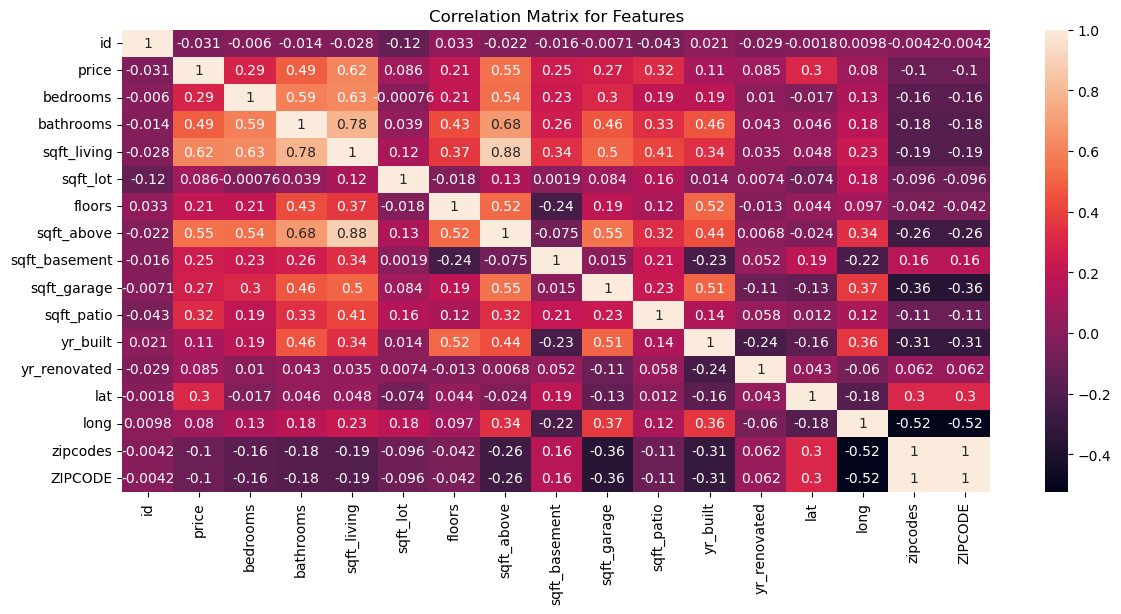

In [55]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.corr(), annot=True)

plt.title('Correlation Matrix for Features')
plt.savefig("corrmat.jpg", dpi = 300)
plt.show()

In [56]:
# THIS IS MY BASE MODEL

X = df[['sqft_living']]
y = df['price']

from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.3803731090091207

<Axes: xlabel='sqft_living', ylabel='price'>

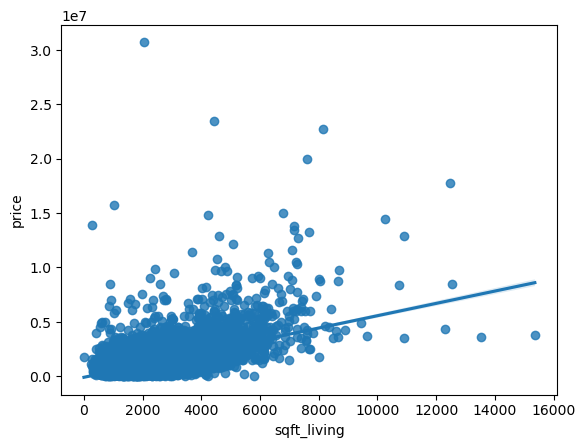

In [57]:
sns.regplot(x =df['sqft_living'],y = df['price'])

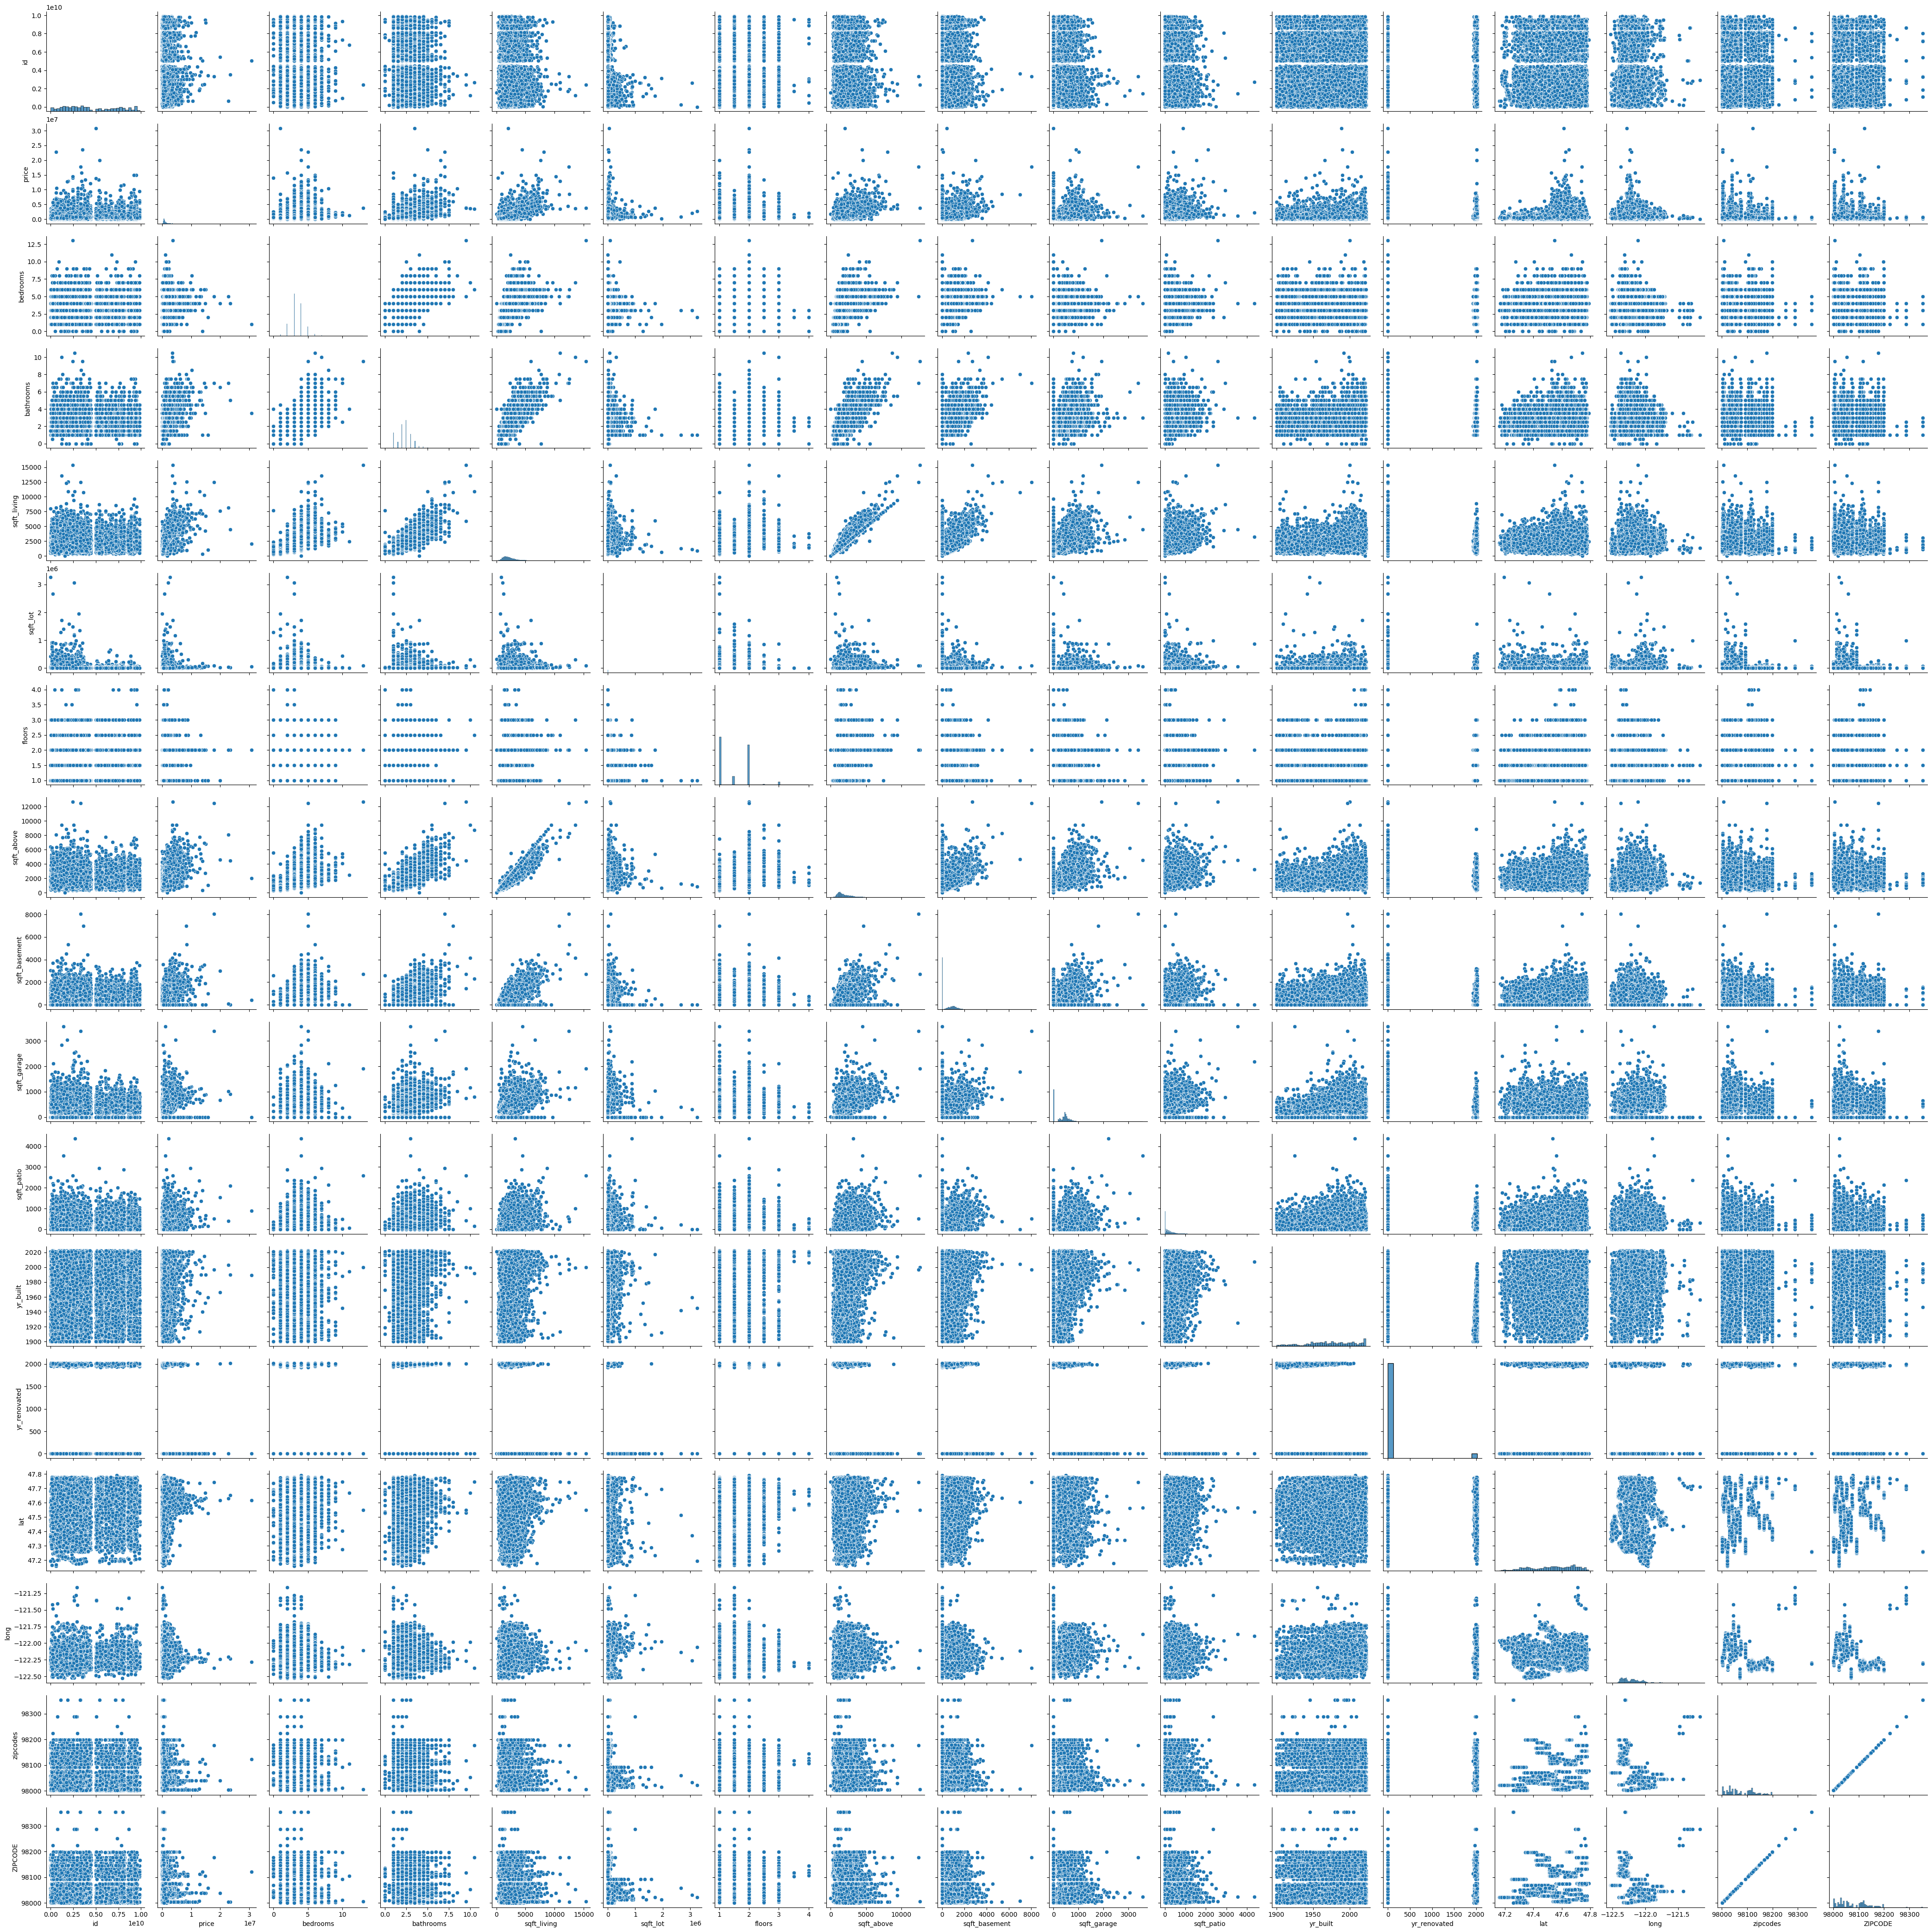

In [58]:
sns.pairplot(df)

<Axes: xlabel='bedrooms', ylabel='Count'>

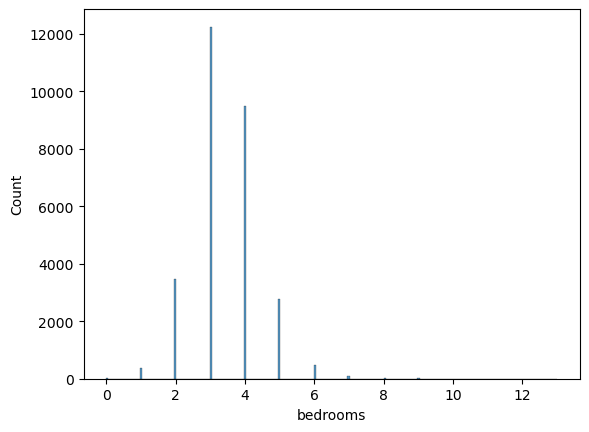

In [59]:
sns.histplot(data = df['bedrooms'])

# Data Cleaning

# Ordinal Encoding

In [60]:
df['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [61]:
df['condition'].unique()

array(['Good', 'Average', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [62]:
df['view'].unique()

array(['NONE', 'AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD'], dtype=object)

In [63]:
df['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [64]:
df['nuisance'].unique()

array(['NO', 'YES'], dtype=object)

In [65]:
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df['view'] = df['view'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['nuisance'] = df['nuisance'].astype('category')

In [66]:
df['condition'] = df['condition'].cat.reorder_categories(['Poor', 'Fair', 'Average','Good', 'Very Good'])
df['grade'] = df['grade'].cat.reorder_categories(['2 Substandard', '3 Poor', '4 Low', '5 Fair', 
                                                  '6 Low Average', '7 Average', '8 Good', '9 Better',
                                                  '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])
df['view'] = df['view'].cat.reorder_categories(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'])
df['waterfront'] = df['waterfront'].cat.reorder_categories(['NO', 'YES'])
df['nuisance'] = df['nuisance'].cat.reorder_categories(['NO', 'YES'])

In [67]:
print(df['grade'].cat.codes)
print(df['condition'].cat.codes)
print(df['view'].cat.codes)
print(df['waterfront'].cat.codes)
print(df['nuisance'].cat.codes)

0        5
1        5
2        5
3        7
4        5
        ..
31777    6
31778    5
31779    5
31780    6
31781    5
Length: 29015, dtype: int8
0        3
1        2
2        2
3        2
4        2
        ..
31777    3
31778    2
31779    2
31780    2
31781    2
Length: 29015, dtype: int8
0        0
1        2
2        2
3        2
4        0
        ..
31777    0
31778    1
31779    0
31780    0
31781    0
Length: 29015, dtype: int8
0        0
1        0
2        0
3        0
4        0
        ..
31777    0
31778    0
31779    0
31780    0
31781    0
Length: 29015, dtype: int8
0        0
1        1
2        0
3        0
4        1
        ..
31777    0
31778    0
31779    1
31780    0
31781    0
Length: 29015, dtype: int8


In [68]:
ord_cat_selector = ['condition', 'grade', 'view', 'waterfront', 'nuisance']
cat_subset = df[ord_cat_selector]
grade_ls = ['2 Substandard', '3 Poor', '4 Low', '5 Fair', 
            '6 Low Average', '7 Average', '8 Good', '9 Better',
            '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']
cond_ls = ['Poor', 'Fair', 'Average','Good', 'Very Good']
view_ls = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
wf_ls = ['NO', 'YES']
nuisance_ls = ['NO', 'YES']
o_enc = OrdinalEncoder(categories = [cond_ls, grade_ls, view_ls, wf_ls, nuisance_ls])
o_enc.fit(cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['2 Substandard', '3 Poor', '4 Low', '5 Fair',
                            '6 Low Average', '7 Average', '8 Good', '9 Better',
                            '10 Very Good', '11 Excellent', '12 Luxury',
                            '13 Mansion'],
                           ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'],
                           ['NO', 'YES'], ['NO', 'YES']])

In [69]:
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)

In [70]:
o_enc.inverse_transform(X_subset)

array([['Good', '7 Average', 'NONE', 'NO', 'NO'],
       ['Average', '7 Average', 'AVERAGE', 'NO', 'YES'],
       ['Average', '7 Average', 'AVERAGE', 'NO', 'NO'],
       ...,
       ['Average', '7 Average', 'NONE', 'NO', 'YES'],
       ['Average', '8 Good', 'NONE', 'NO', 'NO'],
       ['Average', '7 Average', 'NONE', 'NO', 'NO']], dtype=object)

In [71]:
X_subset = X_subset.rename(columns = {'condition': 'house_cond','grade':'grade2', 
                                      'view':'view2', 'waterfront': 'wf2', 'nuisance':'nuisance2'}) 

In [72]:
df1 = pd.concat([df.reset_index(), X_subset], axis =1)

In [73]:
df1.columns

Index(['index', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'coords', 'zipcodes',
       'ZIPCODE', 'PREFERRED_CITY', 'house_cond', 'grade2', 'view2', 'wf2',
       'nuisance2'],
      dtype='object')

# Test Train Split and LR Score

In [74]:
lr = LinearRegression()
lr

LinearRegression()

In [75]:
# removed id, price, ZIPCODE, address, lat, long
col_selector = ['house_cond', 'grade2', 'sqft_living', 'sqft_above', 'sqft_basement', 'bedrooms', 
                'yr_built', 'yr_renovated', 'zipcodes', 'nuisance2', 'view2', 'wf2']
X = df1[col_selector]
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [76]:
lr.fit(X_train, y_train)

LinearRegression()

In [77]:
lr.score(X_train,y_train)

0.5028250605135576

In [78]:
print(len(X_train))
print(len(X_test))

20310
8705


# Nominal Encoding

In [79]:
numeric_cols= ['house_cond', 'grade2', 'sqft_living', 'sqft_above', 'sqft_basement', 'bedrooms', 
                'yr_built', 'yr_renovated', 'zipcodes', 'nuisance2', 'view2', 'wf2']
ss = preprocessing.StandardScaler()


ss.fit(X_train[numeric_cols])

X_stan_train = ss.transform(X_train[numeric_cols])
X_stan_test = ss.transform(X_test[numeric_cols])

X_dfstan_train = pd.DataFrame(X_stan_train, columns = numeric_cols)
X_dfstan_test = pd.DataFrame(X_stan_test, columns = numeric_cols)
                              

In [80]:
df1.columns

Index(['index', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'coords', 'zipcodes',
       'ZIPCODE', 'PREFERRED_CITY', 'house_cond', 'grade2', 'view2', 'wf2',
       'nuisance2'],
      dtype='object')

In [ ]:
col_selector = ['house_cond', 'grade2', 'sqft_living', 'sqft_above', 'sqft_basement', 'bedrooms', 
                'yr_built', 'yr_renovated', 'zipcodes', 'nuisance2', 'view2', 'wf2', 'PREFERRED_CITY']
X = df1[col_selector]
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [ ]:
nominal_cols = ['PREFERRED_CITY']

In [ ]:
ohe.fit(X_train[nominal_cols])
ohe_train = ohe.transform(X_train[nominal_cols])
ohe_test = ohe.transform(X_test[nominal_cols])


ohe_train= pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

In [ ]:
X_train_ohe =pd.concat([X_train.drop(columns = 'PREFERRED_CITY').reset_index(),
                        ohe_train],1)


X_test_ohe =pd.concat([X_test.drop(columns = 'PREFERRED_CITY').reset_index(),
                        ohe_test],1)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_ohe, y_train)

lr.score(X_test_ohe, y_test)